# Adult Census Income Analysis

This notebook explores income patterns in the Adult Census dataset.
The analysis covers data cleaning, feature engineering, exploratory analysis,
and a logistic regression model to examine factors associated with higher income.

# Part 1 - Data Cleaning & Preparation

In [3]:
# 1.1 Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv')
df.head()
df.info()

df.shape
df.columns
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22493,41,Local-gov,107327,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
5464,19,?,172582,Some-college,10,Never-married,?,Own-child,White,Male,0,0,50,United-States,<=50K
9107,21,Private,216070,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Amer-Indian-Eskimo,Female,0,0,46,United-States,>50K
20956,90,Private,139660,Some-college,10,Divorced,Sales,Unmarried,Black,Female,0,0,37,United-States,<=50K
19136,37,Private,176967,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K
11271,59,Private,108496,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21371,38,Self-emp-not-inc,334366,Some-college,10,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,15,United-States,<=50K
9453,31,Self-emp-inc,133861,Assoc-voc,11,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
23361,70,Private,221603,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,34,United-States,<=50K
23899,34,Private,215047,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K


**Findings:**

There are 32,561 rows and 15 columns in the adult census dataset, and it is made up of both numeric and categorical variables.

In [4]:
# 1.2 Missing Values (”?”)

df_clean = df.copy()

for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].replace("?", "Unknown")

df_clean.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,Unknown,>50K


**Findings:**

We can see that the value “?” occurs most often in ‘workclass’, ‘occupation’, and ‘native country’.

In [5]:
print("Total duplicate rows:", df_clean.duplicated().sum())

Total duplicate rows: 24


In [6]:
# 1.3 Remove Duplicate Rows

df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

**Findings:**

We found that the dataset has 24 duplicated rows, so to make sure the dataset was cleaned I removed these, to ensure each record represents a different individual.

In [7]:
# 1.4 Standardise Column Names

df_clean.columns = (
    df_clean.columns
          .str.lower()
          .str.replace('.', '_', regex=False)
          .str.replace('-', '_', regex=False)
)

df_clean.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

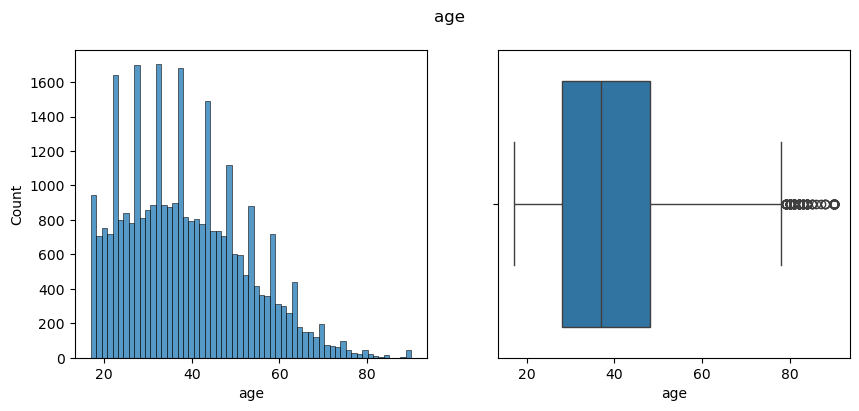

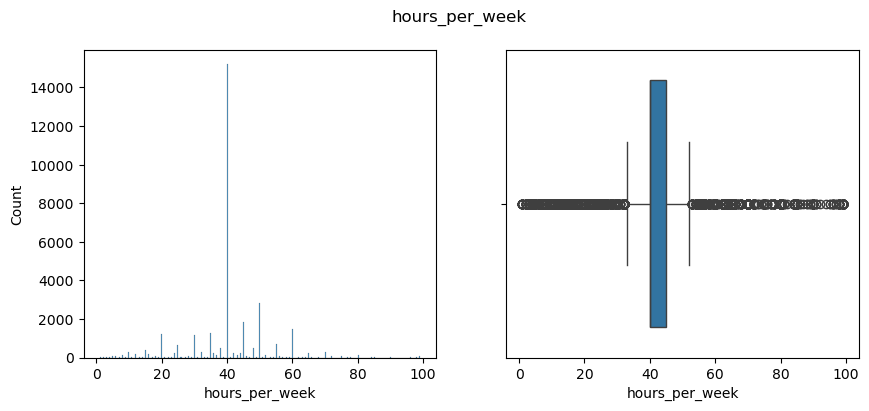

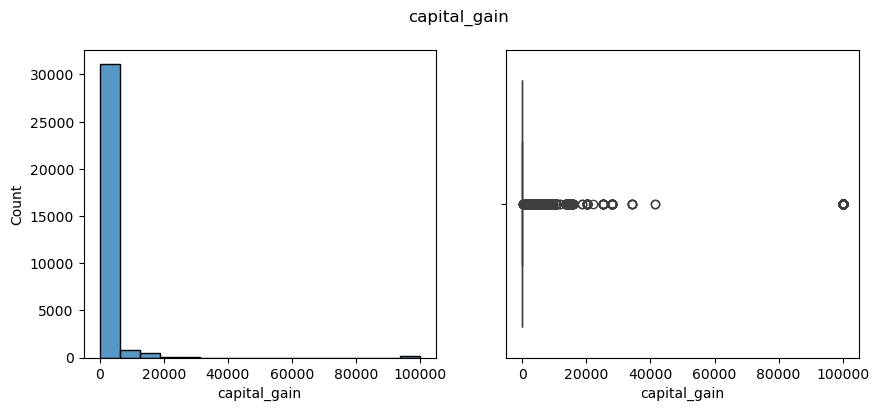

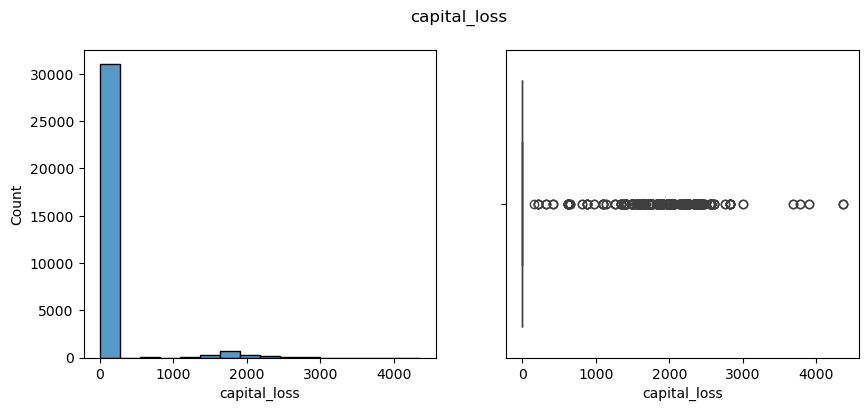

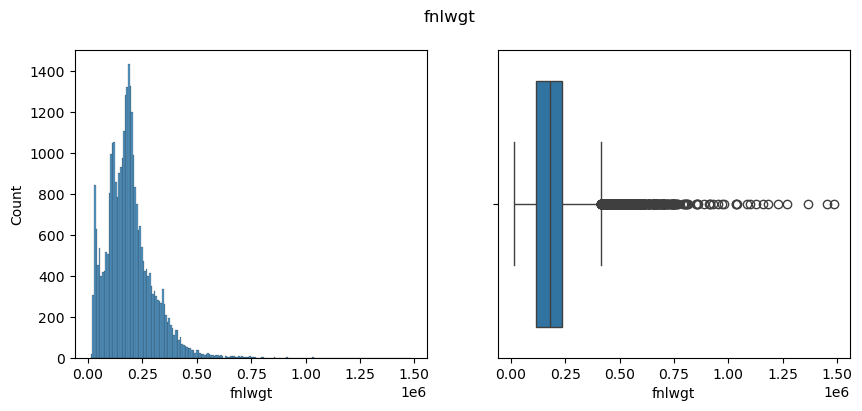

In [8]:
# 1.5 Distribution Plots
numeric_cols = ['age', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(df_clean[col], ax=ax[0])
    sns.boxplot(x=df_clean[col], ax=ax[1])
    plt.suptitle(col)
    plt.show()

**Summary:**

- Age is right-skewed, with most people around 25–50.
- Large number of people work 40 hours per week.
- Capital gain/loss values are almost always zero.
- fnlwgt is heavily skewed.

In [11]:
# 1.6 Outlier Detection (IQR Method)

def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

for col in numeric_cols:
    lower, upper = iqr_bounds(df_clean[col])
    print(col, (df_clean[col] < lower).sum() + (df_clean[col] > upper).sum())
      
gain_lower, gain_upper = iqr_bounds(df_clean['capital_gain'])
loss_lower, loss_upper = iqr_bounds(df_clean['capital_loss'])

age 142
hours_per_week 9002
capital_gain 2712
capital_loss 1519
fnlwgt 993


**Summary:**

Using the IQR method, we could see that there were numerous outliers. Age, fnlwgt, and hours_per_week had unusual but still realistic values, so I kept those rows. However, for capital_gain and capital_loss, I decided to remove the rows with extreme values in those columns, as they had a small number of very extreme values on top of many zeros.

In [13]:
gain_lower, gain_upper = iqr_bounds(df_clean['capital_gain'])
loss_lower, loss_upper = iqr_bounds(df_clean['capital_loss'])

df_clean = df_clean[
    (df_clean['capital_gain'] <= gain_upper) &
    (df_clean['capital_loss'] <= loss_upper)
].reset_index(drop=True)

print("New dataset size:", df_clean.shape)

New dataset size: (28306, 15)


In [15]:
# 1.7 Feature Engineering

df_clean['is_senior'] = df_clean.age >= 60
df_clean['is_full_time'] = df_clean.hours_per_week >= 40
df_clean['high_education'] = df_clean.education_num >= 13
df_clean['has_gain'] = df_clean.capital_gain > 0
df_clean['has_loss'] = df_clean.capital_loss > 0
df_clean['income_binary'] = (df_clean.income == '>50K').astype(int)

# Age groups
age_bins = [0, 25, 45, 65, 100]
age_labels = ['Young', 'Adult', 'Mid-age', 'Senior']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

df_clean.head(11)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,is_senior,is_full_time,high_education,has_gain,has_loss,income_binary,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,False,False,True,False,False,0,Mid-age
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,False,True,False,False,False,0,Adult
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,False,True,False,False,False,0,Mid-age
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,False,True,True,False,False,0,Adult
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,United-States,<=50K,False,True,True,False,False,0,Adult
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,16,Jamaica,<=50K,False,False,False,False,False,0,Mid-age
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,45,United-States,>50K,False,True,False,False,False,1,Mid-age
7,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,...,80,United-States,>50K,False,True,False,False,False,1,Adult
8,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,...,40,India,>50K,False,True,True,False,False,1,Adult
9,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,...,30,United-States,<=50K,False,False,True,False,False,0,Young


To help support the analysis, I created three new variables: is_senior, is_full_time, and income_binary.

# Part 1 Summary

In this section I was cleaning and preparing the dataset and I did this by replacing missing values, removing duplicates, standardising column names, and then using the IQR method to identify any outliers. Within the outliers, I decided to keep the realistic ones from age, fnlwgt, and hours_per_week. However, I removed the extreme ones from capital_gain and capital_loss to ensure that a few unusual cases did not dominate the analysis.

Once everything was cleaned, I created the three new features: is_senior, is_full_time, and income_binary. After all these steps, the dataset now sits at 28,306 rows.

# Part 2 — Exploratory Data Analysis

In [16]:
# 2.1 Descriptive Statistics

print("New dataset size:", df_clean.shape)
df_clean.describe()

New dataset size: (28306, 22)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_binary
count,28306.000000,2.830600e+04,28306.000000,28306.0,28306.0,28306.000000,28306.000000
mean,37.898219,1.901739e+05,9.939907,0.0,0.0,39.995266,0.190384
std,13.585597,1.061678e+05,2.525802,0.0,0.0,12.304052,0.392611
min,17.000000,1.228500e+04,1.000000,0.0,0.0,1.000000,0.000000
25%,27.000000,1.177790e+05,9.000000,0.0,0.0,39.000000,0.000000
50%,36.000000,1.788420e+05,10.000000,0.0,0.0,40.000000,0.000000
75%,47.000000,2.375838e+05,12.000000,0.0,0.0,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,0.0,0.0,99.000000,1.000000


**Summary:**  
The dataset shows typical distributions for age, working hours, and education level.  
Most people work around 40 hours per week, and only a minority earn more than 50K.

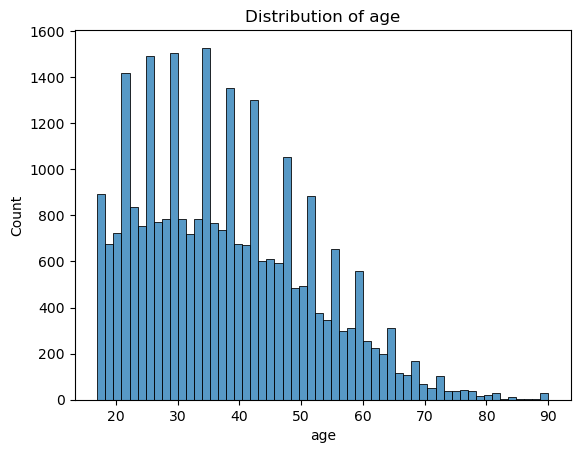

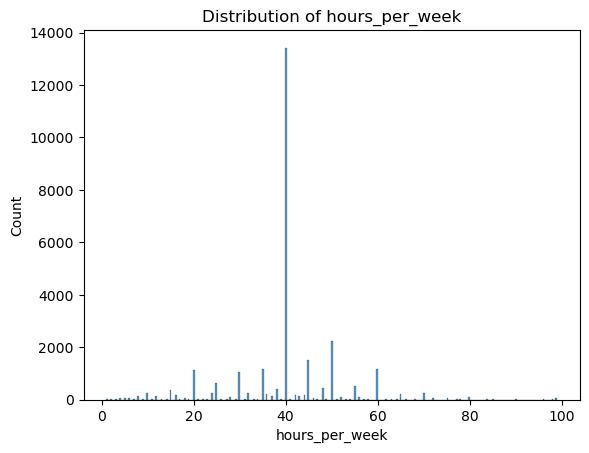

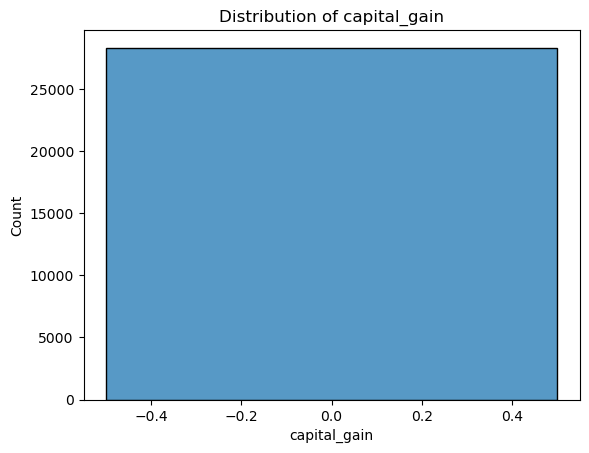

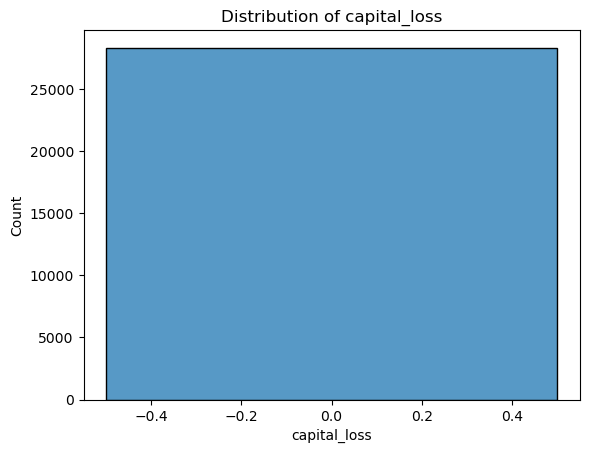

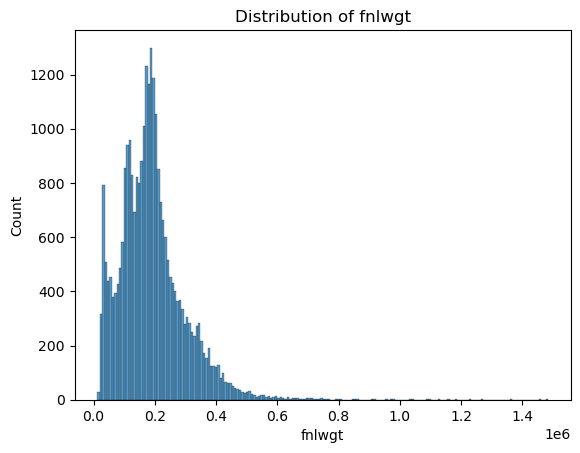

In [17]:
numeric_cols = ['age', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

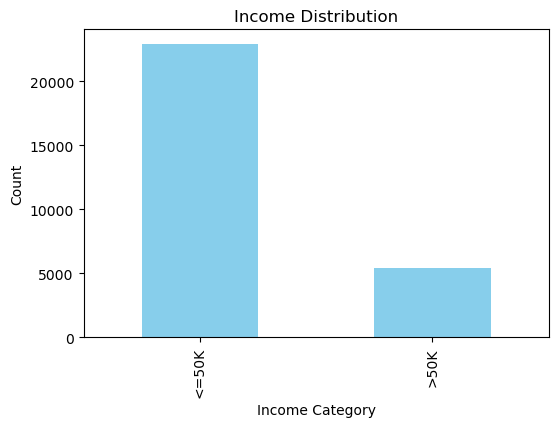

In [18]:
# 2.2 Income Distribution

plt.figure(figsize=(6,4))
df_clean['income'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

**Findings:**

We can see that the majority of people in the dataset earn ≤50K.

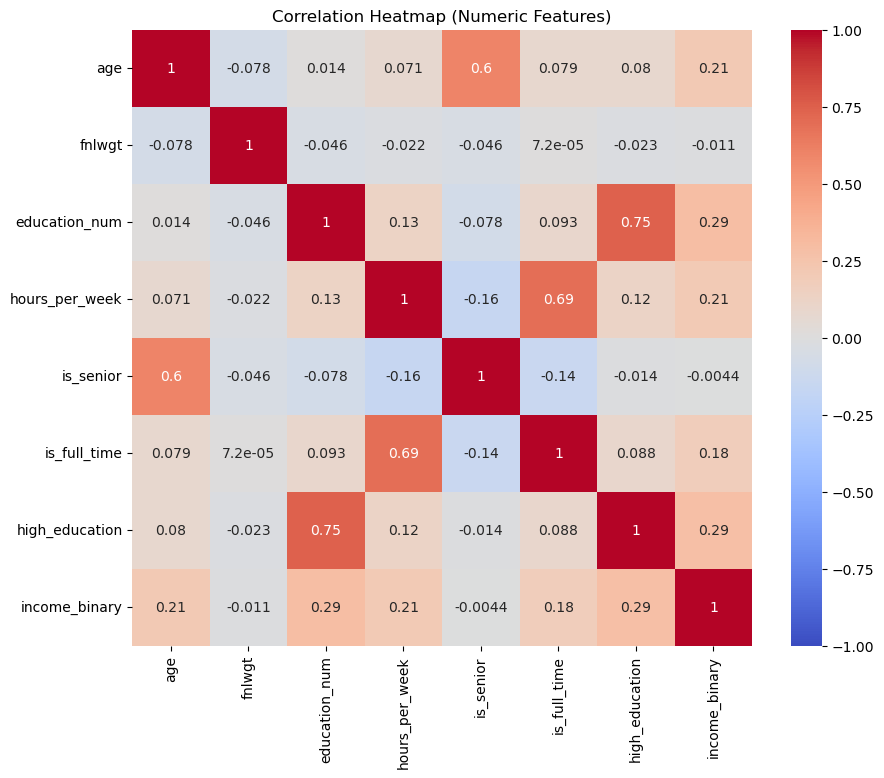

In [19]:
# 2.3 Correlation Heatmap

corr = (
    df_clean
        .drop(columns=[
            'capital_gain',
            'capital_loss',
            'has_gain',
            'has_loss'
        ])
        .corr(numeric_only=True)
)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

**Findings:**

- People with higher education_num are usually more likely to earn >50K.
- People who work more hours_per_week tend to have slightly higher income.
- There is no strong relationship between age and income.

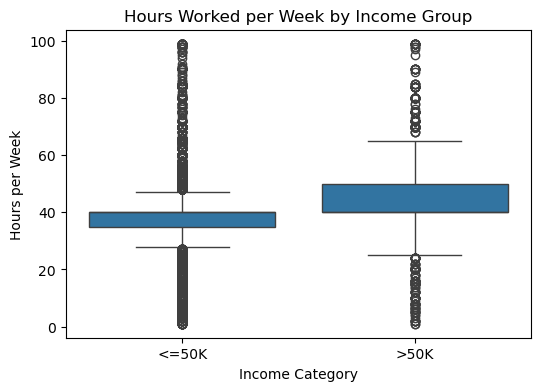

In [20]:
# 2.4 Bivariate Analysis: Hours Worked vs Income

plt.figure(figsize=(6,4))
sns.boxplot(x='income', y='hours_per_week', data=df_clean)
plt.title('Hours Worked per Week by Income Group')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

**Findings:**

What we can see from this graph is that people who earn >50K tend to work more hours on average. 
The average number of hours worked for those in the >50K group is around 50–60+. 
This suggests that working longer hours is related to earning more in this dataset.

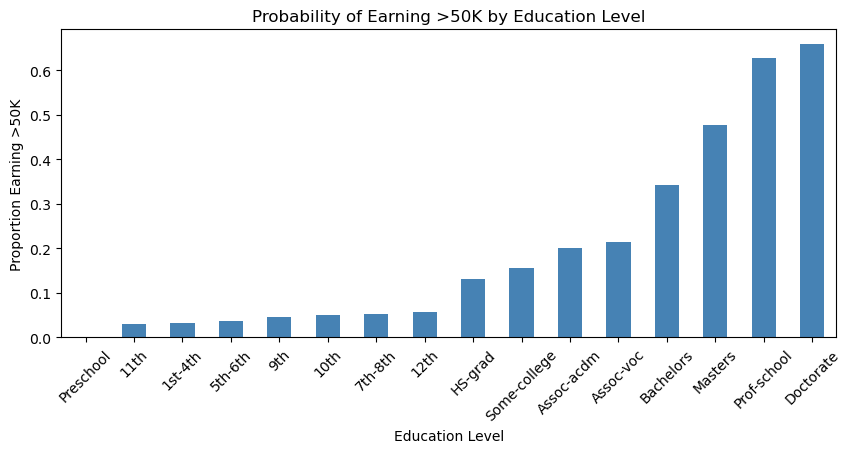

In [21]:
# 2.5 Bivariate Analysis: Education Level vs Income

edu_income = df_clean.groupby('education')['income_binary'].mean().sort_values()

plt.figure(figsize=(10,4))
edu_income.plot(kind='bar', color='steelblue')
plt.title('Probability of Earning >50K by Education Level')
plt.ylabel('Proportion Earning >50K')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

**Findings:**

People with higher levels of education have a strong link with earning a higher income. Those who completed university degrees such as a Bachelor’s, Master’s, or Doctorate have a higher chance of earning >50K compared to those with little or no schooling. We can see that education seems to be one of the strongest indicators of income.

# Part 3 — Merge With Regions Dataset

In [22]:
# 3.1 Load and Merge

regions = pd.read_csv("countries_regions.csv")
df_merged = df_clean.merge(regions, how="left", on="native_country")
df_merged['region'] = df_merged['region'].fillna('Unknown')

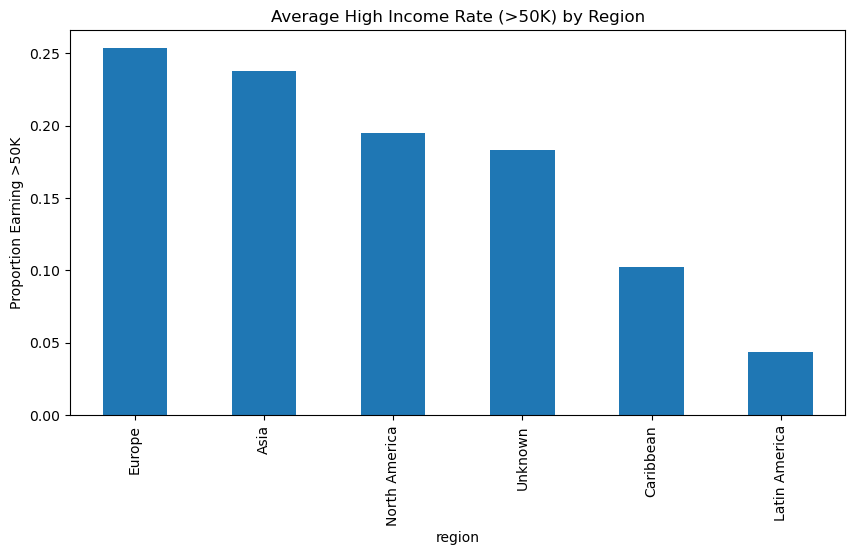

In [23]:
# 3.2 Compare Income by Region

region_income = df_merged.groupby('region')['income_binary'].mean().sort_values(ascending=False)
region_income.plot(kind='bar', figsize=(10,5))
plt.title("Average High Income Rate (>50K) by Region")
plt.ylabel("Proportion Earning >50K")
plt.show()

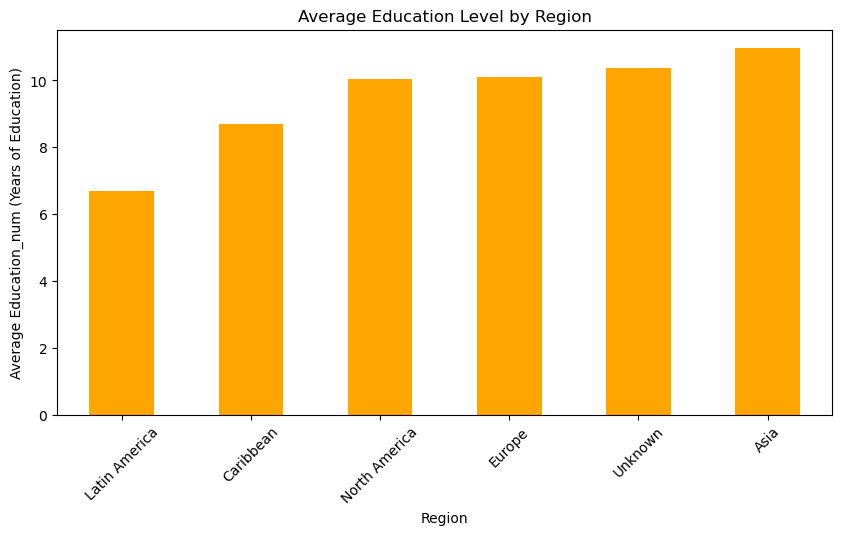

In [24]:
# 3.3 Education Level by Region

edu_region = df_merged.groupby('region')['education_num'].mean().sort_values()

plt.figure(figsize=(10,5))
edu_region.plot(kind='bar', color='orange')
plt.title('Average Education Level by Region')
plt.ylabel('Average Education_num (Years of Education)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

**Finding:**

We can see from this chart that people born in Europe and Asia, on average, attended more years of education and reached higher education levels (higher education_num values) than those from Latin America or the Caribbean.

This also matches what we said earlier in the assignment, where education may partly explain why some regions have higher income levels.

Areas of the world with lower education levels also tend to have the lowest proportion of people earning >50K.

# Part 4 — Predictive Modelling (Logistic Regression)

In [25]:
# 4.1 Prepare Data

model_df = df_merged[
    [
        'income_binary',
        'age',
        'education_num',
        'hours_per_week',
        'workclass',
        'marital_status',
        'occupation',
        'sex',
        'race',
        'region'
    ]
]
model_df = pd.get_dummies(model_df, drop_first=True)

In [26]:
# 4.2 Train/Test Split & Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = model_df.drop('income_binary', axis=1)
y = model_df['income_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8537515896566341

In [27]:
# 4.3 Important Features

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values("Coefficient", ascending=False)
coefficients.head(15)

,Feature,Coefficient
12,marital_status_Married-civ-spouse,2.120306
11,marital_status_Married-AF-spouse,1.740561
19,occupation_Exec-managerial,0.742237
35,race_White,0.597577
25,occupation_Prof-specialty,0.564655
32,race_Asian-Pac-Islander,0.556838
28,occupation_Tech-support,0.497800
26,occupation_Protective-serv,0.461251
33,race_Black,0.435119
37,region_Europe,0.348429


Top Predictors of High Income:
- marital_status_Married-civ-spouse
- marital_status_Married-AF-spouse
- occupation_Exec-managerial
- occupation_Prof-specialty
- education_num
- sex_Male
- race_White
- region_Europe

# Part 5 — Interpretation & Reflection

With the logistic regression model, we were able to see clearer inequalities in the Adult Census dataset. From this, we could see that the strongest indicator of earning more than 50K was actually marital status, people who were married were more likely to have higher incomes. Another major factor was job type, with people in professional or managerial roles having the biggest positive effect. Education was also a major factor, especially for those with higher qualifications such as a Master’s, Bachelor’s, or Doctorate.

What we can also see from this analysis is the effect of gender and race. For example, white men were more likely to earn higher incomes. This does not mean they are paid more simply because they are white men, but rather that it reflects the social and structural inequalities that existed when the data was collected. Region of birth also had an impact, but this can be linked back to the education levels of individuals.

Even though this analysis and the model used worked well and gave us some good insights, it does have its limitations. One of the biggest limitations with logistic regression is that it cannot capture the full complexity of how income is decided in real life. Along with this, the dataset we used includes historical and social biases. When doing an analysis like this, it is always important to remember that correlation does not mean causation, so the model can only show the patterns it finds, not explain why these patterns exist. There could be a number of real-life factors, such as employer behaviour, childcare responsibility, discrimination, location of work, or access to resources, that are not included in the dataset.

To ensure that a model is ethical and fair, many data analysts use techniques that help reduce bias and protect people’s privacy. An example of this is anonymisation, which removes any personal information from individuals, such as names, addresses, or dates of birth. This helps make sure that people in the dataset cannot be identified.

An example of another technique is suppression, which is where information that is sensitive or very rare is removed. For example, if only a few people in the dataset were from a very small minority group, keeping that category could risk identifying them or could lead to biased model results. Analysts would sometimes suppress these rare categories or group them into larger ones to prevent discrimination and unstable predictions.

To conclude, I learnt a lot from doing this assignment, such as how easily statistical models can show social inequalities, even when the goal was simply to analyse the data. To ensure analysis is fair, responsible, and safe, we can use techniques such as anonymisation and suppression. When creating an analysis, it’s not just about the technical skills needed, but also about understanding how the data can be used to reinforce or challenge inequality.